In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')

sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [3]:
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 21)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6,Automatic


## Create data subset

In [4]:
# Create data subset
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

## Plot 1: Fuel Efficiency and Transmission Type

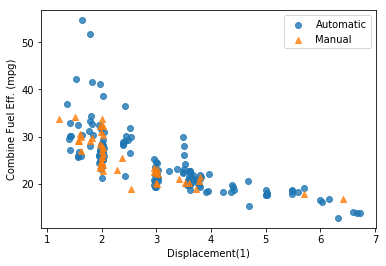

In [5]:
# Plot fuel Efficiency and transmission type
ttype_markers = [['Automatic', 'o'], 
                 ['Manual', '^']]

for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]
    sb.regplot(data = plot_data, x = 'displ', y = 'comb', x_jitter = 0.04, fit_reg = False, marker = marker);
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');
plt.legend(['Automatic', 'Manual']);

**Question**: *Are there differences between cars with automatic transmission and manual transmission in terms of fuel efficiency and engine size?*

Since `trans_type` is categorical, **shape** is a good encoding to use. In both the `sb.regplot` and `plt.scatter` functions, the `marker` parameter can be used to set the shape of the plotted points. Unfortunately, in both cases, the parameter can only take a single string. This means that we need to create a loop to plot each subset of the data one by one.

First, we set a list of lists `ttype_markers` with the mapping of levels to symbol types. Cars with `Automatic` transmission will be circles set by the string "o" and cars with `Manual` transmission will be triangles set by the string "^". We've set it up as a list of lists rather than a dictionary to easily control the order in which levels are plotted.

Then, we're going to loop over the list of elements: `ttype` will match with the selected the transmission type (`Automatic` or `Manual`) and `marker` will be put in the `sb.regplot` function.

Finally, we can add a legend to the plot by using Matplotlib's legend function. As the argument to the function, we give a list of labels to place on the legend, one for each `sb.regplot` call: `['Automatic', 'Manual']`.

## Plot 2: Fuel Efficiency and C02 Emissions


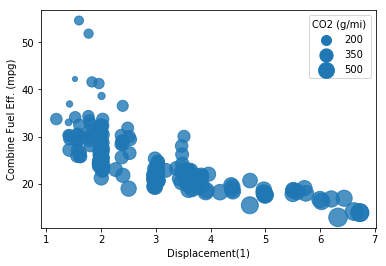

In [6]:
# Plot fuel efficiency and C02 emissions
sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb', 
           x_jitter = 0.04, fit_reg = False, scatter_kws = {'s' : fuel_econ_subset['co2']/2});
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');

sizes = [200, 350, 500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes: 
    legend_obj.append(plt.scatter([], [], s=s/2, color = base_color))
plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)');

**Question**: *Are there differences between cars with different level of CO2 in terms of fuel efficiency and engine size?*

Since `co2` is numeric, one encoding we could use is the **marker size**. In Matplotlib's `scatter` function, we can set the marker size with the `s` parameter mapping to the name of the column we want, `co2`. However, since we're using `sb.regplot`, I need to set the parameter as part of a dictionary on the `scatter_kws` and explicitly assign it the full series rather than just the column name: `scatter_kws = {'s' : fuel_econ_subset['co2']}`.

To reduce the marker size, set `scatter_kws = { 's' : fuel_econ_subset['co2'] / 2}`.

Since we only have one scatterplot series plotted, the legend will only give us a single dot. As a work around, we can add dummy scatter plot sequences so that we can construct our legend. When we use plotting functions in Matplotlib and Seaborn, we actually get plotting objects back. We haven't been storing them so far since we've not needed them, but this is one case where we want them.

Let's set up a list of three `co2` values that we want to use for the size legend reference: `sizes = [200, 350, 500]`. 

Then inside the loop, use the scatter function to create scatterplot objects setting the necessary point sizes: `plt.scatter([], [], s= s/2, color=base_color)`. The first two empty lists are x and y position, so no points are actually plotted. We've also added a color argument so that of our new series share a consistent color.

Finally we're going to set up a list to store all of our dummy scatter plot objects:

`legend_obj.append(plt.scatter([], [], s=s/2, color=base_color))`.

In the `plt.legend` function, if there's only one argument, then it is assumed to be the labels for the plot objects. With two arguments, the first one is a list of objects to be depicted in the legend (`legend_obj`) and the second one is a list of labels (`sizes`). We've also added a title for the legend.


`plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)')`
